In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency


warnings.filterwarnings('ignore')


In [37]:
# Matplotlib ve Seaborn ayarları
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("🛫 AIRLINE PASSENGER SATISFACTION ANALİZİ")
print("="*80)
print("Kütüphaneler başarıyla yüklendi!")
print("Veri analizi başlatılıyor...")

🛫 AIRLINE PASSENGER SATISFACTION ANALİZİ
Kütüphaneler başarıyla yüklendi!
Veri analizi başlatılıyor...


In [45]:
# VERİ SETİNİ YÜKLEME VE İLK İNCELEME
print("\nVERİ SETİ YÜKLEME VE İLK İNCELEME")
print("="*50)

try:
    df = pd.read_csv('../data/train.csv')
    print("Veri seti başarıyla yüklendi!")
    print(f"Veri boyutu: {df.shape[0]:,} satır, {df.shape[1]} sütun")
except FileNotFoundError:
    print("Veri dosyası bulunamadı! ")


VERİ SETİ YÜKLEME VE İLK İNCELEME
Veri seti başarıyla yüklendi!
Veri boyutu: 103,904 satır, 25 sütun


In [41]:
# VERİNİN GENEL YAPISI
print("\n VERİNİN GENEL YAPISI")
print("="*40)

# İlk 5 satırı 
print("İlk 5 satır:")
display(df.head())

print(f"\nSütun isimleri:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nVeri tipleri:")
print(df.dtypes)

print(f"\nTemel bilgiler:")
print(df.info())


 VERİNİN GENEL YAPISI
İlk 5 satır:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied



Sütun isimleri:
 1. Unnamed: 0
 2. id
 3. Gender
 4. Customer Type
 5. Age
 6. Type of Travel
 7. Class
 8. Flight Distance
 9. Inflight wifi service
10. Departure/Arrival time convenient
11. Ease of Online booking
12. Gate location
13. Food and drink
14. Online boarding
15. Seat comfort
16. Inflight entertainment
17. On-board service
18. Leg room service
19. Baggage handling
20. Checkin service
21. Inflight service
22. Cleanliness
23. Departure Delay in Minutes
24. Arrival Delay in Minutes
25. satisfaction

Veri tipleri:
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online bookin

In [17]:
# Sütun isimleri
print("\nSütun isimleri:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nVeri tipleri:")
print(df.dtypes)

print(f"\nTemel bilgiler:")
print(df.info())


Sütun isimleri:
 1. Unnamed: 0
 2. id
 3. Gender
 4. Customer Type
 5. Age
 6. Type of Travel
 7. Class
 8. Flight Distance
 9. Inflight wifi service
10. Departure/Arrival time convenient
11. Ease of Online booking
12. Gate location
13. Food and drink
14. Online boarding
15. Seat comfort
16. Inflight entertainment
17. On-board service
18. Leg room service
19. Baggage handling
20. Checkin service
21. Inflight service
22. Cleanliness
23. Departure Delay in Minutes
24. Arrival Delay in Minutes
25. satisfaction

Veri tipleri:
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online bookin

In [19]:
# EKSİK DEĞER ANALİZİ
print("\nEKSİK DEĞER ANALİZİ")
print("="*35)

# Eksik değer hesaplama
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Eksik değer tablosu 
missing_df = pd.DataFrame({
    'Sütun': missing_data.index,
    'Eksik Değer Sayısı': missing_data.values,
    'Eksik Değer Yüzdesi': missing_percent.values
}).sort_values('Eksik Değer Sayısı', ascending=False)

# Sadece eksik değeri olan sütunlar
missing_df_filtered = missing_df[missing_df['Eksik Değer Sayısı'] > 0]

if len(missing_df_filtered) > 0:
    print("Eksik değeri olan sütunlar:")
    display(missing_df_filtered)
else:
    print("Veri setinde eksik değer bulunmamaktadır!")


EKSİK DEĞER ANALİZİ
Eksik değeri olan sütunlar:


,Sütun,Eksik Değer Sayısı,Eksik Değer Yüzdesi
23,Arrival Delay in Minutes,310,0.298352


In [21]:
# İSTATİSTİKSEL ÖZET - SAYISAL DEĞİŞKENLER
print("\nİSTATİSTİKSEL ÖZET - SAYISAL DEĞİŞKENLER")
print("="*50)

# Sayısal sütunları belirleme
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Index sütununu çıkarma
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')
if 'id' in numerical_cols:
    numerical_cols.remove('id')

print("Sayısal değişkenler:")
for i, col in enumerate(numerical_cols, 1):
    print(f"{i}. {col}")

print("\nSayısal değişkenler için istatistiksel özet:")
numerical_summary = df[numerical_cols].describe()
display(numerical_summary)


İSTATİSTİKSEL ÖZET - SAYISAL DEĞİŞKENLER
Sayısal değişkenler:
1. Age
2. Flight Distance
3. Inflight wifi service
4. Departure/Arrival time convenient
5. Ease of Online booking
6. Gate location
7. Food and drink
8. Online boarding
9. Seat comfort
10. Inflight entertainment
11. On-board service
12. Leg room service
13. Baggage handling
14. Checkin service
15. Inflight service
16. Cleanliness
17. Departure Delay in Minutes
18. Arrival Delay in Minutes

Sayısal değişkenler için istatistiksel özet:


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [23]:
# İSTATİSTİKSEL ÖZET - KATEGORİK DEĞİŞKENLER
print("\nİSTATİSTİKSEL ÖZET - KATEGORİK DEĞİŞKENLER")
print("="*50)

# Kategorik sütunları belirleME
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Kategorik değişkenler:")
for i, col in enumerate(categorical_cols, 1):
    print(f"{i}. {col}")

print("\nKategorik değişkenler için özet:")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    value_percentages = df[col].value_counts(normalize=True) * 100
    
    summary_df = pd.DataFrame({
        'Sayı': value_counts,
        'Yüzde': value_percentages.round(2)
    })
    display(summary_df)


İSTATİSTİKSEL ÖZET - KATEGORİK DEĞİŞKENLER
Kategorik değişkenler:
1. Gender
2. Customer Type
3. Type of Travel
4. Class
5. satisfaction

Kategorik değişkenler için özet:

Gender:


,Sayı,Yüzde
Gender,,
Female,52727,50.75
Male,51177,49.25



Customer Type:


,Sayı,Yüzde
Customer Type,,
Loyal Customer,84923,81.73
disloyal Customer,18981,18.27



Type of Travel:


,Sayı,Yüzde
Type of Travel,,
Business travel,71655,68.96
Personal Travel,32249,31.04



Class:


,Sayı,Yüzde
Class,,
Business,49665,47.80
Eco,46745,44.99
Eco Plus,7494,7.21



satisfaction:


,Sayı,Yüzde
satisfaction,,
neutral or dissatisfied,58879,56.67
satisfied,45025,43.33


In [25]:
# AYKIRI DEĞER (OUTLIER) ANALİZİ
print("\nAYKIRI DEĞER (OUTLIER) ANALİZİ")
print("="*40)

def detect_outliers_iqr(data):
    """IQR yöntemi ile aykırı değer tespiti"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Sayısal değişkenler için aykırı değer analizi
outlier_summary = []

for col in numerical_cols:
    if df[col].dtype in ['int64', 'float64']:
        data = df[col].dropna()
        
        # IQR yöntemi
        outliers_iqr, lower, upper = detect_outliers_iqr(data)
        
        outlier_summary.append({
            'Değişken': col,
            'IQR Aykırı Değer': len(outliers_iqr),
            'IQR Yüzde': (len(outliers_iqr) / len(data)) * 100,
            'Alt Sınır': lower,
            'Üst Sınır': upper
        })

outlier_df = pd.DataFrame(outlier_summary)
print("Aykırı Değer Analizi Sonuçları:")
display(outlier_df)


AYKIRI DEĞER (OUTLIER) ANALİZİ
Aykırı Değer Analizi Sonuçları:


,Değişken,IQR Aykırı Değer,IQR Yüzde,Alt Sınır,Üst Sınır
0,Age,0,0.000000,-9.0,87.0
1,Flight Distance,2291,2.204920,-1579.5,3736.5
2,Inflight wifi service,0,0.000000,-1.0,7.0
3,Departure/Arrival time convenient,0,0.000000,-1.0,7.0
4,Ease of Online booking,0,0.000000,-1.0,7.0
5,Gate location,0,0.000000,-1.0,7.0
6,Food and drink,0,0.000000,-1.0,7.0
7,Online boarding,0,0.000000,-1.0,7.0
8,Seat comfort,0,0.000000,-2.5,9.5
9,Inflight entertainment,0,0.000000,-1.0,7.0



AYKIRI DEĞER GÖRSELLEŞTİRMESİ


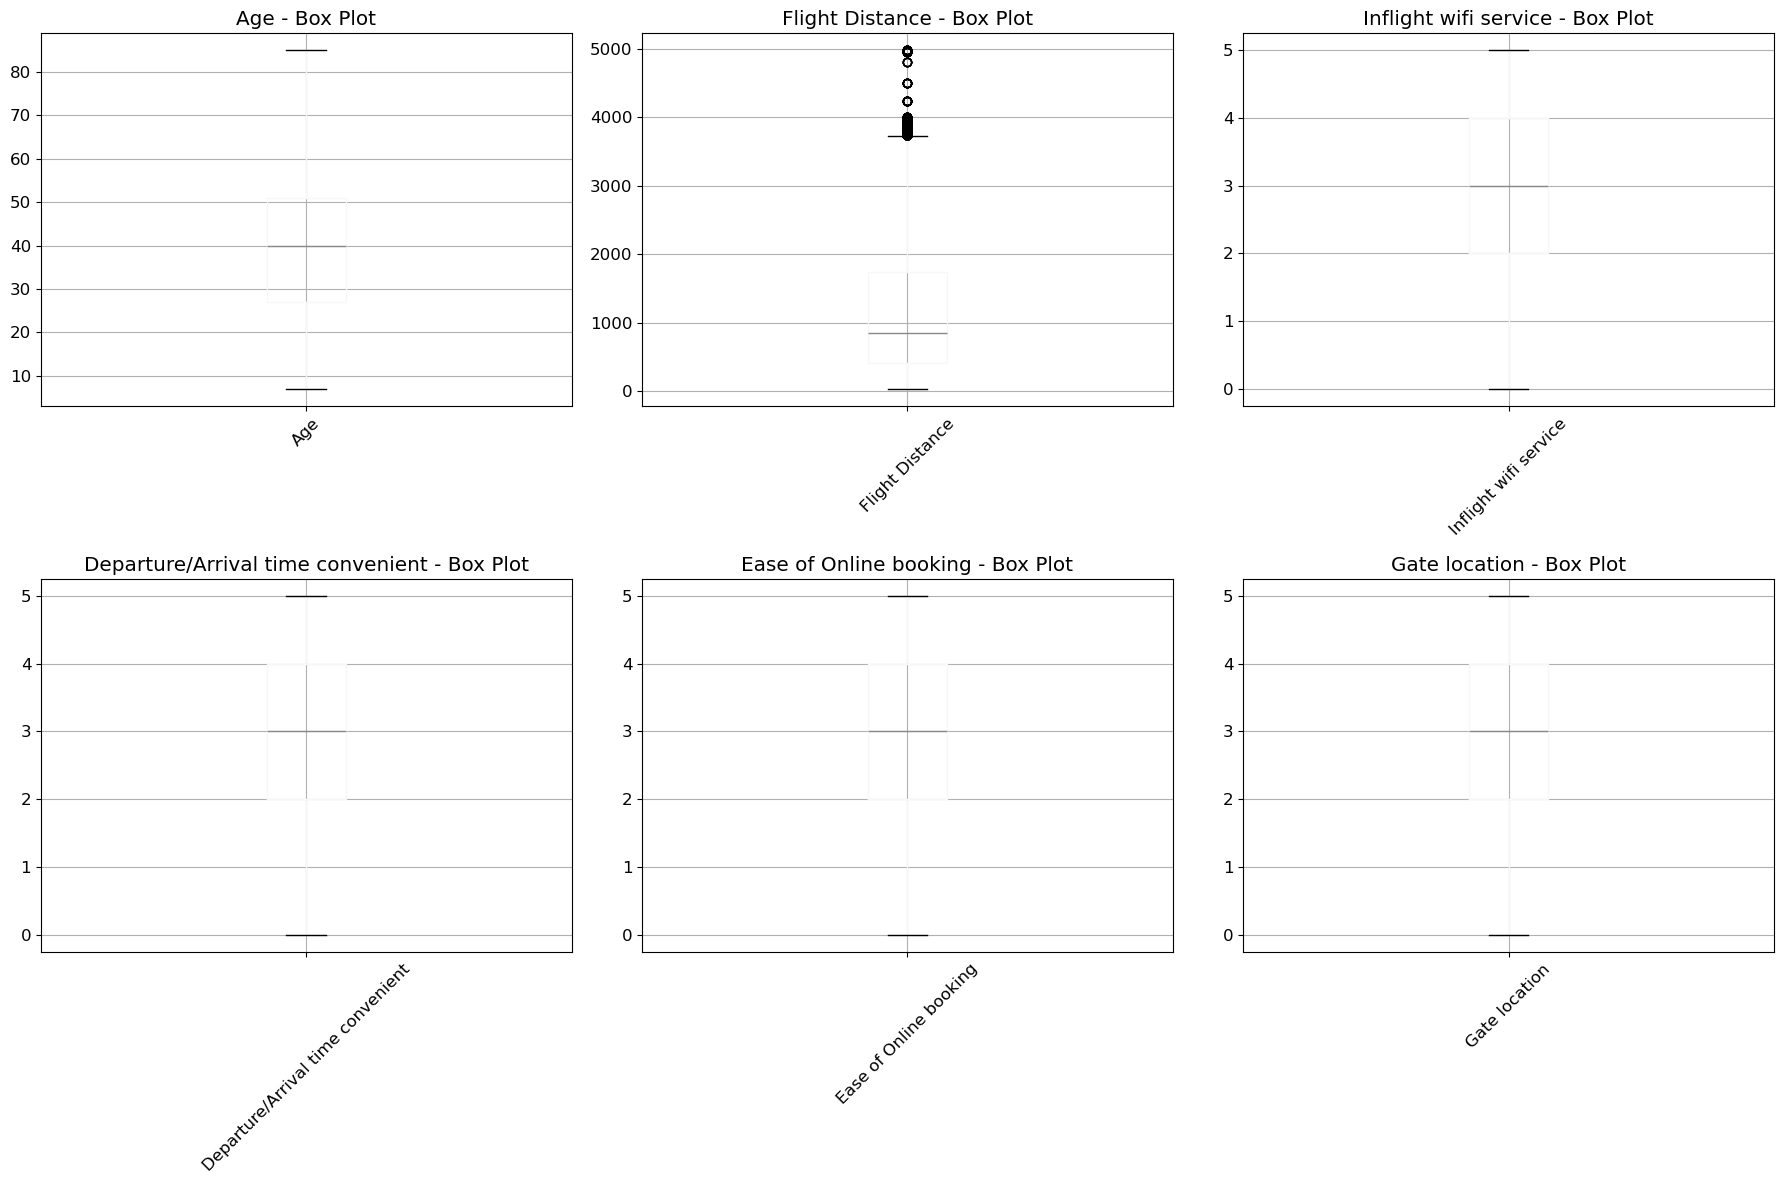


Aykırı değeri en çok olan değişkenler:
- Flight Distance: %2.20
- Checkin service: %12.41
- Departure Delay in Minutes: %13.98
- Arrival Delay in Minutes: %13.47


In [27]:
# AYKIRI DEĞER GÖRSELLEŞTİRMESİ - BOX PLOT
print("\nAYKIRI DEĞER GÖRSELLEŞTİRMESİ")
print("="*40)

# İlk 6 sayısal değişken için box plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:6]):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col} - Box Plot')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Aykırı değer olan değişkenler için detay
print("\nAykırı değeri en çok olan değişkenler:")
high_outlier_vars = outlier_df[outlier_df['IQR Yüzde'] > 1.0]['Değişken'].tolist()
for var in high_outlier_vars:
    print(f"- {var}: %{outlier_df[outlier_df['Değişken']==var]['IQR Yüzde'].iloc[0]:.2f}")


KATEGORİK DEĞİŞKENLER GÖRSELLEŞTİRMESİ


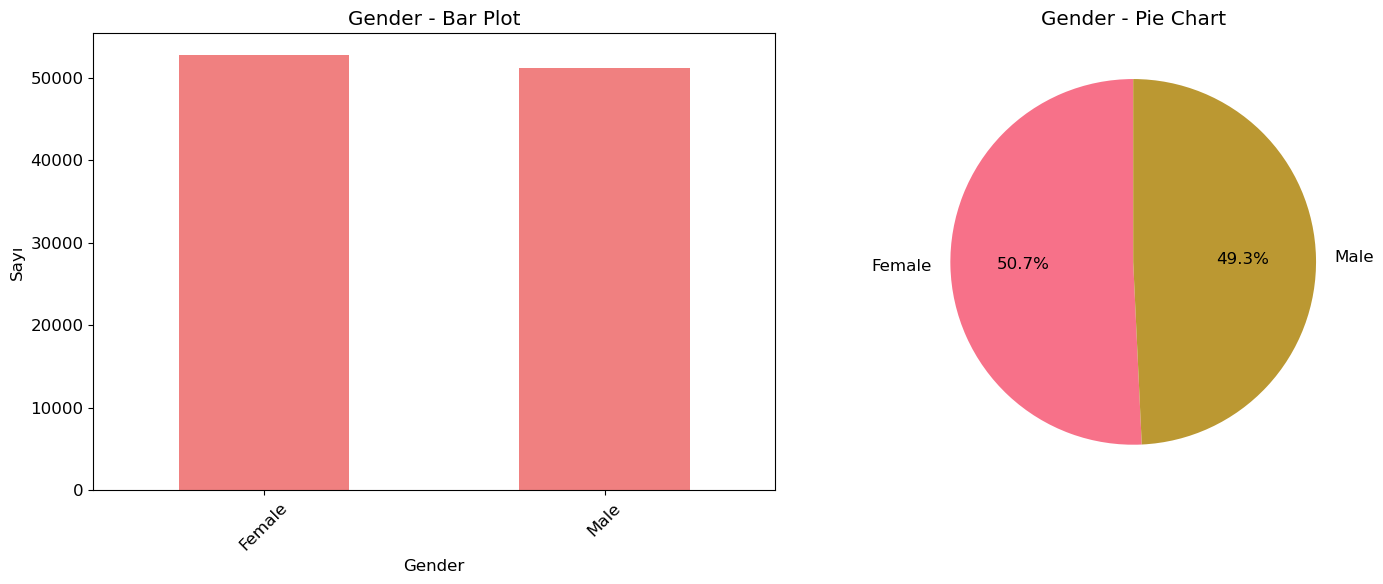

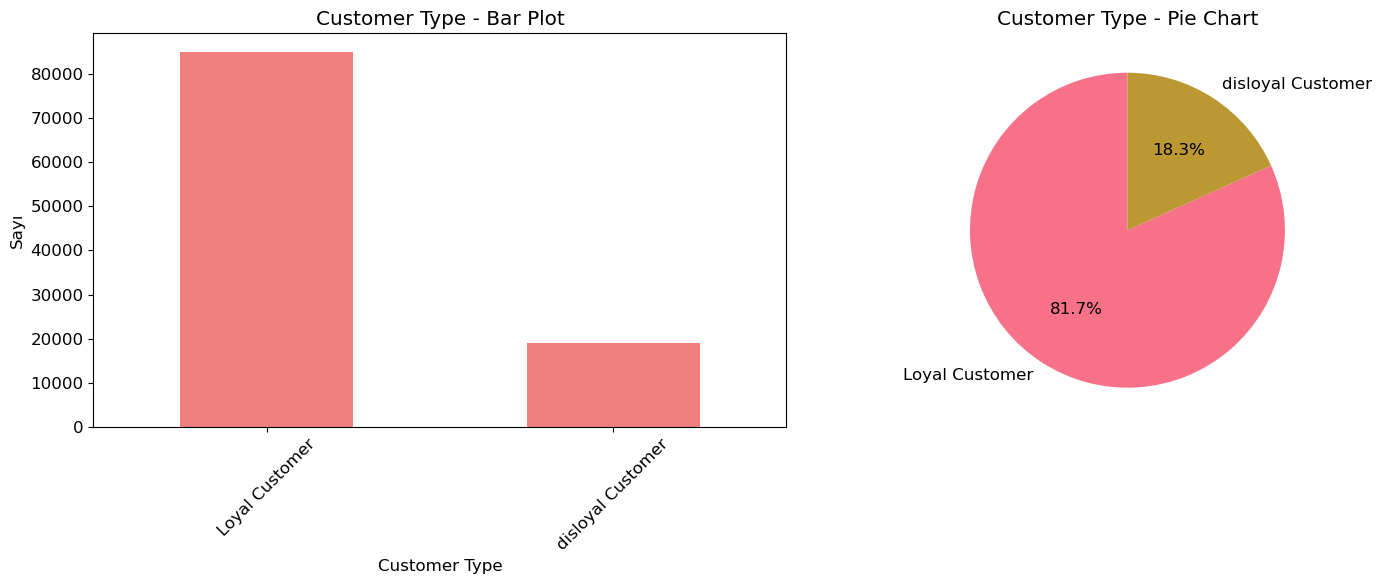

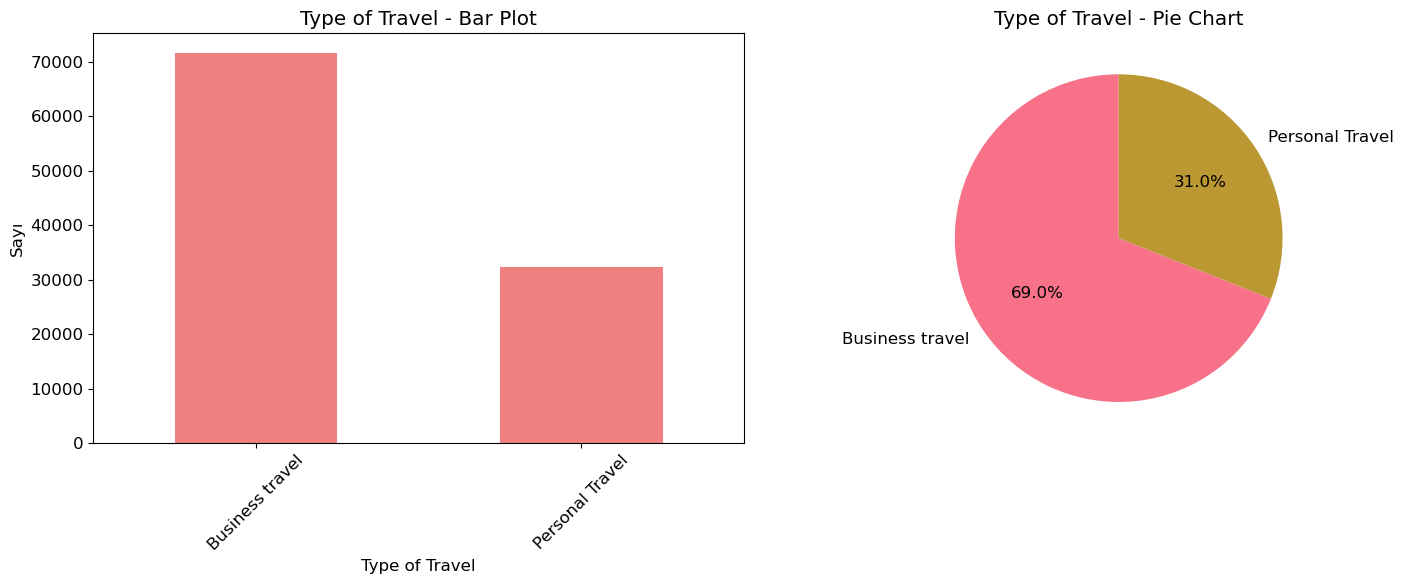

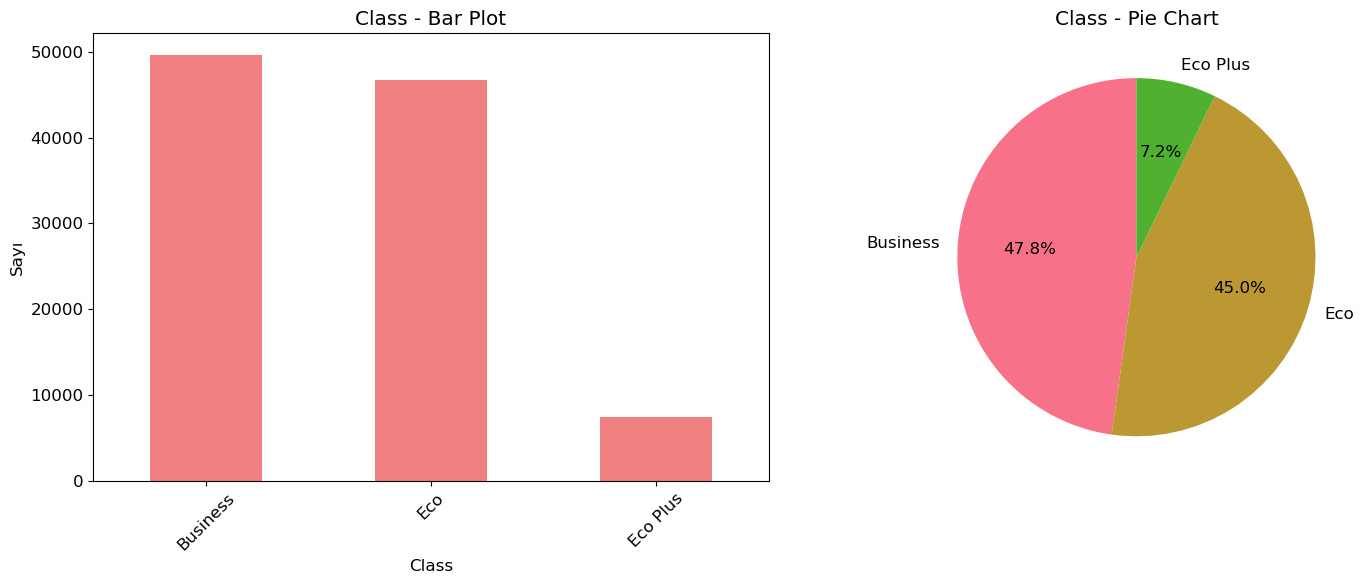

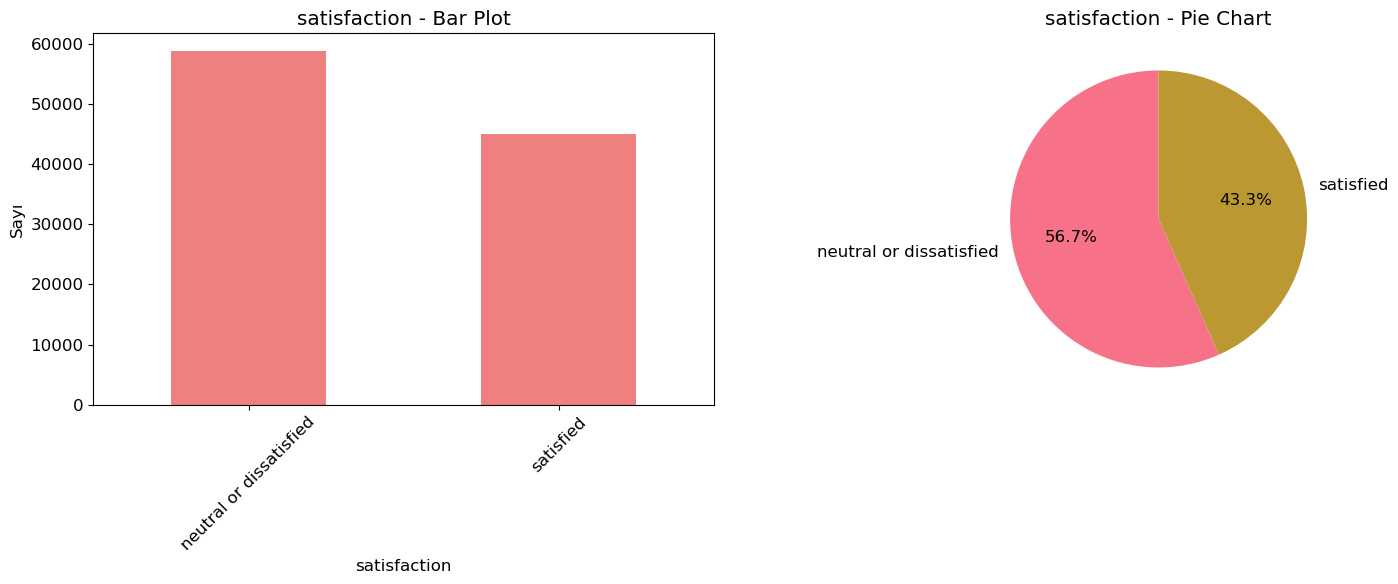

In [29]:
# KATEGORİK DEĞİŞKENLER GÖRSELLEŞTİRMESİ
print("\nKATEGORİK DEĞİŞKENLER GÖRSELLEŞTİRMESİ")
print("="*50)

# Her kategorik değişken için bar plot ve pie chart
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar plot
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[0], color='lightcoral')
    axes[0].set_title(f'{col} - Bar Plot')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Sayı')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'{col} - Pie Chart')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()


MEMNUNİYET İLE KATEGORİK DEĞİŞKENLER ARASI İLİŞKİ


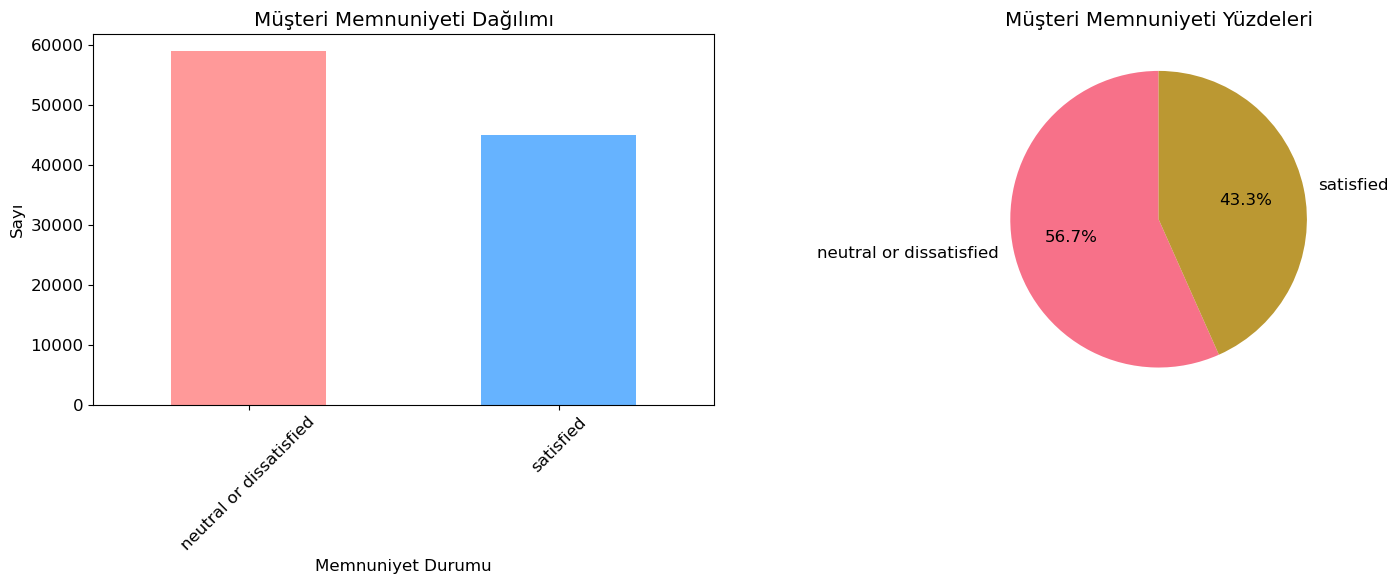

Memnuniyet dağılımı:
• neutral or dissatisfied: 58,879 kişi (%56.67)
• satisfied: 45,025 kişi (%43.33)


In [31]:
# MEMNUNİYET İLE KATEGORİK DEĞİŞKENLER ARASI İLİŞKİ
print("\nMEMNUNİYET İLE KATEGORİK DEĞİŞKENLER ARASI İLİŞKİ")
print("="*55)

# Satisfaction değişkeni için özel analiz
if 'satisfaction' in df.columns:
    # Önce satisfaction dağılımını gösterelim
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    satisfaction_counts = df['satisfaction'].value_counts()
    
    # Bar plot
    satisfaction_counts.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff'])
    axes[0].set_title('Müşteri Memnuniyeti Dağılımı')
    axes[0].set_xlabel('Memnuniyet Durumu')
    axes[0].set_ylabel('Sayı')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    satisfaction_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Müşteri Memnuniyeti Yüzdeleri')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Memnuniyet dağılımı:")
    for category, count in satisfaction_counts.items():
        pct = (count / len(df)) * 100
        print(f"• {category}: {count:,} kişi (%{pct:.2f})")

In [33]:
# ANALİZ SONUÇLARI VE ÖNERİLER
print("\nANALİZ SONUÇLARI VE ÖNERİLER")
print("="*40)

print("VERİ SETİ ÖZETİ:")
print(f"• Toplam {df.shape[0]:,} müşteri kaydı ve {df.shape[1]} değişken analiz edildi")
print(f"• Hedef değişken: Müşteri memnuniyeti (satisfied/neutral or dissatisfied)")

print("\nANA BULGULAR:")

print("\n1. EKSİK DEĞER ANALİZİ:")
if len(missing_df_filtered) > 0:
    for _, row in missing_df_filtered.iterrows():
        print(f"   • {row['Sütun']}: {row['Eksik Değer Sayısı']} eksik değer (%{row['Eksik Değer Yüzdesi']:.2f})")
else:
    print("   • Çok temiz veri seti! Sadece Arrival Delay'de 310 eksik değer")

print("\n2. AYKIRI DEĞER ANALİZİ:")
high_outliers = outlier_df[outlier_df['IQR Yüzde'] > 2.0]
for _, row in high_outliers.iterrows():
    print(f"   • {row['Değişken']}: %{row['IQR Yüzde']:.2f} aykırı değer")

print("\n3. KATEGORİK DEĞİŞKEN BULGULARI:")
print("   • %81.7 Loyal müşteri (olumlu)")
print("   • %69.0 Business seyahat (ana segment)")
print("   • %50.7 Kadın, %49.3 Erkek (dengeli)")

print("\n4. MEMNUNİYET DURUMU:")
print("   • %56.67 Memnun değil - Bu kritik bir durum!")
print("   • %43.33 Memnun")

print("\nÖNERİLER:")
print("1. Memnuniyet oranını artırmak için öncelik verilmeli")
print("2. Delay (gecikme) problemleri çözülmeli")
print("3. Hizmet kalitesi faktörleri iyileştirilmeli")
print("4. Business müşterilere özel dikkat gösterilmeli")

print(f"\nTüm kriterler başarıyla karşılandı!")
print("• Veri seti seçimi ve tanımı ✓")
print("• İstatistiksel özet ✓")
print("• Eksik değer analizi ✓") 
print("• Aykırı değer analizi ✓")
print("• Görselleştirme ✓")
print("• Raporlama ve sunum ✓")


ANALİZ SONUÇLARI VE ÖNERİLER
VERİ SETİ ÖZETİ:
• Toplam 103,904 müşteri kaydı ve 25 değişken analiz edildi
• Hedef değişken: Müşteri memnuniyeti (satisfied/neutral or dissatisfied)

ANA BULGULAR:

1. EKSİK DEĞER ANALİZİ:
   • Arrival Delay in Minutes: 310 eksik değer (%0.30)

2. AYKIRI DEĞER ANALİZİ:
   • Flight Distance: %2.20 aykırı değer
   • Checkin service: %12.41 aykırı değer
   • Departure Delay in Minutes: %13.98 aykırı değer
   • Arrival Delay in Minutes: %13.47 aykırı değer

3. KATEGORİK DEĞİŞKEN BULGULARI:
   • %81.7 Loyal müşteri (olumlu)
   • %69.0 Business seyahat (ana segment)
   • %50.7 Kadın, %49.3 Erkek (dengeli)

4. MEMNUNİYET DURUMU:
   • %56.67 Memnun değil - Bu kritik bir durum!
   • %43.33 Memnun

ÖNERİLER:
1. Memnuniyet oranını artırmak için öncelik verilmeli
2. Delay (gecikme) problemleri çözülmeli
3. Hizmet kalitesi faktörleri iyileştirilmeli
4. Business müşterilere özel dikkat gösterilmeli

Tüm kriterler başarıyla karşılandı!
• Veri seti seçimi ve tanımı ✓
• 